# Introduction 

So i just want to try things i havent tried in a while, yep thats right. its using twitter for sentiment analysis. I got this dataset from kaggle and this notebook is a few adjustment i made it from other participants that submit it on kaggle. Feel free to give me any feedback from this notebook! :)

In [1]:
!kaggle datasets download -d manchunhui/us-election-2020-tweets -progressbar

  0%|                                                | 0.00/353M [00:00<?, ?B/s]^C
  0%|                                                | 0.00/353M [00:00<?, ?B/s]
User cancelled operation


In [7]:
## unzip data from data_input
!unzip us-election-2020-tweets.zip 

Archive:  us-election-2020-tweets.zip
  inflating: hashtag_donaldtrump.csv  
  inflating: hashtag_joebiden.csv    


## 1.1 Data preparation

Lets import some library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

output = '../output'
Path(output).mkdir(exist_ok=True, parents=True)

## 1.2 Data Exploration

trying to understand the data better, so i took this approach.
- p.s most of the time everyone use this approach as well

In [3]:
trump_df = pd.read_csv('./data_input/hashtag_donaldtrump.csv', lineterminator='\n')
biden_df = pd.read_csv('./data_input/hashtag_joebiden.csv', lineterminator='\n')

In [4]:
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [5]:
biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [6]:
print('Total number of records in Trump dataset:', trump_df.shape)
print('Total number of records in Biden dataset:', biden_df.shape)

Total number of records in Trump dataset: (970919, 21)
Total number of records in Biden dataset: (776886, 21)


In [7]:
trump_initial_count = trump_df.shape[0]
biden_initial_count = biden_df.shape[0]

print('Initial counts:')
print('Total number of records in Trump dataset:', trump_initial_count)
print('Total number of records in Biden dataset:', biden_initial_count)

Initial counts:
Total number of records in Trump dataset: 970919
Total number of records in Biden dataset: 776886


In [8]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [9]:
# check for null values
trump_df.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     876
user_id                      0
user_name                   22
user_screen_name             0
user_description        101268
user_join_date               0
user_followers_count         0
user_location           294962
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
collected_at                 0
dtype: int64

In [10]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [11]:
#check for null values in Biden dataset
biden_df.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   25
user_screen_name             0
user_description         82009
user_join_date               0
user_followers_count         0
user_location           233794
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

# 1.3 Data Wrangling 

so we have seen the data, and we know that we dont need all of them for our analysis. We can try to sort things up by removing unncessary columns also dropping the null values
- p.s it may not good for us to drop the null rows like this. but because we have this much data i believe its kinda ok to do it 

In [12]:
# remove unnecessary columns
irrelevant_columns = ['source', 'user_name','user_screen_name','user_description','user_join_date','collected_at']

trump_df = trump_df.drop(columns=irrelevant_columns)
biden_df = biden_df.drop(columns=irrelevant_columns)

In [13]:
# drop null rows
trump_df = trump_df.dropna()
biden_df = biden_df.dropna()

In [14]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199303 entries, 2 to 970912
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            199303 non-null  object 
 1   tweet_id              199303 non-null  float64
 2   tweet                 199303 non-null  object 
 3   likes                 199303 non-null  float64
 4   retweet_count         199303 non-null  float64
 5   user_id               199303 non-null  float64
 6   user_followers_count  199303 non-null  float64
 7   user_location         199303 non-null  object 
 8   lat                   199303 non-null  float64
 9   long                  199303 non-null  float64
 10  city                  199303 non-null  object 
 11  country               199303 non-null  object 
 12  continent             199303 non-null  object 
 13  state                 199303 non-null  object 
 14  state_code            199303 non-null  object 
dtypes: fl

In [15]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164751 entries, 6 to 776881
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            164751 non-null  object 
 1   tweet_id              164751 non-null  float64
 2   tweet                 164751 non-null  object 
 3   likes                 164751 non-null  float64
 4   retweet_count         164751 non-null  float64
 5   user_id               164751 non-null  float64
 6   user_followers_count  164751 non-null  float64
 7   user_location         164751 non-null  object 
 8   lat                   164751 non-null  float64
 9   long                  164751 non-null  float64
 10  city                  164751 non-null  object 
 11  country               164751 non-null  object 
 12  continent             164751 non-null  object 
 13  state                 164751 non-null  object 
 14  state_code            164751 non-null  object 
dtypes: fl

In [16]:
print('Trump data', trump_df.shape)
print('Biden data', biden_df.shape)

Trump data (199303, 15)
Biden data (164751, 15)


## 1.3 Localization

In [17]:
trump_df.country.value_counts()

country
United States of America    101967
United Kingdom               20031
Germany                      12115
France                       11892
Canada                       10809
India                        10032
Australia                     5415
The Netherlands               5098
Spain                         3186
Brazil                        2339
Pakistan                      1817
Italy                         1806
Bangladesh                    1388
Ireland                       1278
Belgium                       1158
Mexico                        1094
Nigeria                       1086
South Africa                  1014
Switzerland                    942
United Arab Emirates           766
Peru                           626
Lebanon                        504
Ecuador                        497
Argentina                      419
Colombia                       329
Honduras                       256
Venezuela                      239
New Zealand                    236
Poland      

In [18]:
trump_df.country.unique()

array(['United States of America', 'United Kingdom', 'The Netherlands',
       'Canada', 'France', 'Australia', 'India', 'Germany', 'Switzerland',
       'Mexico', 'Ireland', 'Ecuador', 'Italy', 'Spain', 'Colombia',
       'Pakistan', 'Peru', 'United Arab Emirates', 'Bangladesh',
       'South Africa', 'Brazil', 'Uruguay', 'Nigeria', 'Belgium',
       'Lebanon', 'Argentina', 'New Zealand', 'Honduras', 'El Salvador',
       'Venezuela', 'Bolivia', 'Philippines', 'Trinidad and Tobago',
       'Papua New Guinea', 'Poland', 'Lithuania', 'Laos', 'Burkina Faso',
       'Sudan', "Côte d'Ivoire", 'Kuwait', 'Syria', 'Oman', 'Slovakia',
       'Suriname', 'Somalia', 'Guyana', 'Cameroon', 'Guatemala', 'Libya',
       'South Sudan'], dtype=object)

In [19]:
trump_usa = trump_df[trump_df.country == 'United States of America']
biden_usa = biden_df[biden_df.country == 'United States of America']

In [20]:
print('Total number of records in Trump USA dataset: ', trump_usa.shape)
print('Total number of records in Biden USA dataset: ', biden_usa.shape)

Total number of records in Trump USA dataset:  (101967, 15)
Total number of records in Biden USA dataset:  (90642, 15)


In [21]:
# trying to look back at the dataset again, because we know both of these dataset originally just one dataset but being split into two categories. 

trump_id = trump_usa.tweet_id
biden_id = biden_usa.tweet_id

ids_tweets_in_common = set(trump_usa.tweet_id).intersection(set(biden_usa.tweet_id))
len(ids_tweets_in_common)


19883

Around 20.000 tweets show up in both dataset. I think it doesn't make sense for the same tweet to contribute to compute the sentiment towards Biden and towards Trump. Let's say one tweet has a negative emotion, do we know if it's negative towards both candidates or only towards one of them and just mentions the second ?
Let's have a look at a few of the 'duplicate' tweets.

In [22]:
pd.options.display.max_colwidth = 1000

biden_usa.tweet.loc[biden_usa.tweet_id.isin(list(ids_tweets_in_common))].head(10)

6      In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?
17                               Comments on this? "Do Democrats Understand how Ruthless China is?" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ
36                                                                                                                                                                               A simple question. Who are you voting for? #2020Election #DonaldTrump #JoeBiden #uspoli #mapoli
131                                     @stephbarlow2 @JoshSchwerin @soledadobrien Disclaimer, totally support dems this #Election2020 but will watch #Trump #FlameShow to nurture th

In [22]:
# we can drop the tweets that are in common between the two datasets

trump_usa_clean = trump_usa[~trump_usa.tweet_id.isin(list(ids_tweets_in_common))]
biden_usa_clean = biden_usa[~biden_usa.tweet_id.isin(list(ids_tweets_in_common))]

print('Total number after cleaning the Trump dataset: ', trump_usa_clean.shape)
print('Total number after cleaning the Biden dataset: ', biden_usa_clean.shape)

Total number after cleaning the Trump dataset:  (82063, 15)
Total number after cleaning the Biden dataset:  (70728, 15)


## 1.4 Language Detection

we knew that this tweet dataset doesnt all come from just one language. so we try to fix that 

In [23]:
example_tweet = trump_usa_clean.tweet.iloc[90]
print(example_tweet)

#Trump: “El 3 de noviembre será el día más emocionante en la historia de las elecciones estadounidenses”. https://t.co/GuqB6n5xzG


In [24]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect(example_tweet)

'es'

In [25]:
def get_language(tweet):
    try: 
        lang=detect(tweet)
    except:
        lang='no'
        print("This tweet throws an error:", tweet)  
    return lang

In [26]:
import time

start_time = time.time()

test_df = trump_usa_clean.iloc[:1000].copy()
test_df['lang'] = test_df.tweet.apply(lambda x: get_language(x))

stop_time = time.time()

print(f'It took {np.around((time.time() - start_time),decimals=1)} seconds')

It took 2.7 seconds


In [27]:
trump_usa_clean['lang'] = trump_usa_clean.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'It took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: ⁣
⁣
𝘋𝘰 𝘯𝘰𝘵 𝘷𝘰𝘵𝘦 𝘧𝘰𝘳 #𝘊𝘰𝘷𝘪𝘥𝘪𝘰𝘵𝘐𝘯𝘊𝘩𝘪𝘦𝘧 𝘰𝘳 𝘵𝘩𝘦 #𝘔𝘢𝘴𝘬𝘭𝘦𝘴𝘴𝘋𝘶𝘮𝘣𝘈𝘴𝘴⁣
⁣
𝘕𝘰 𝘮𝘰𝘳𝘦 #𝘛𝘙𝘜𝘔𝘗
This tweet throws an error: I😂😂😂😂😂😂 🤮🤮🤮🤮🤮🤮😂😂😂😂😂🤢🤢🤢🤢🤢🤢🤢🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮😣😣😣😣😣😳😳😳😳😳😳😳😳😳🤮🤮🤮🤮🤮🤮🤮🤮🤢🤢🤢🤢🤢🤢🤒🤒🤒🤒🤒🤒🤒🤒🤒🤒🤒 sums it when I see #trump dancing https://t.co/9BdiBshAVX
This tweet throws an error: @Trailblaze2top #trump ‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼‼
This tweet throws an error: 🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020
🆃🆁🆄🅼🅿 2020

RT #ElectionDay #Trump
This tweet throws an error: #Trump 2️⃣0️⃣2️⃣0️⃣🇺🇸🇺🇸🇺🇸❤️🤍💙 https://t.co/57yUuOuiqB
This tweet throws an error: Pennsylvania 👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀👀#BattlegroundState  #Trump #TrumpPence2020 #Vote #PA
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
          🇺🇸
          🇺🇸
          🇺🇸
          🇺🇸

🇺🇸🇺🇸🇺🇸🇺🇸

/tmp/ipykernel_16002/3945969438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_usa_clean['lang'] = trump_usa_clean.tweet.apply(lambda x: get_language(x))


In [28]:
biden_usa_clean['lang'] = biden_usa_clean.tweet.apply(lambda x: get_language(x))

stop_time = time.time()
print(f'It took {np.around((time.time() - start_time), decimals=1)} seconds')

This tweet throws an error: 👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻#JoeBiden https://t.co/9lnd35iOfq
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#Biden https://t.co/9CvcaErqN6
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#joebiden https://t.co/hPFsbGIGQB
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸#BIDEN https://t.co/njfvCATvn6
This tweet throws an error: 𝗟𝗜𝗦𝗧𝗘𝗡𝗜𝗡𝗚 𝗧𝗢 𝗧𝗛𝗘 𝗦𝗖𝗜𝗘𝗡𝗧𝗜𝗦𝗧 .... 
𝗜 𝘄𝗼𝗻𝗱𝗲𝗿 𝘄𝗵𝗶𝗰𝗵 𝗦𝗰𝗶𝗲𝗻𝘁𝗶𝘀𝘁 #𝗕𝗶𝗱𝗲𝗻 𝘄𝗼𝘂𝗹𝗱𝗻'𝘁 𝗼𝗳 𝗹𝗶𝘀𝘁𝗲𝗻 𝘁𝗼 ..... 𝗛𝗺𝗺𝗺𝗺𝗺 ?????   🤔
https://t.co/xU894RTSaN via @YouTube
This tweet throws an error: 🇺🇸🇺🇸💫💫🇺🇸🇺🇸💫🇺🇸🇺🇸🇺🇸💫💫🇺🇸🇺🇸💫💫🇺🇸💫💫💫🇺🇸💫💫💫💫💫#JoeBiden💫🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸💫💫💫 https://t.co/nX0zcgeB6e
This tweet throws an error: ┏━━┓┏━━┓┏━━┓┏━━┓ ┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃ ┏━┛┃┃┃┃┃┏━┛┃┃┃┃┃ ❤️🤍💙🇺🇲 🅱🅸🅳🅴🅽 🇺🇲❤️🤍💙 ┃┗━┓┃┗┛┃┃┗━┓┃┗┛┃ ┗━━┛┗━━┛┗━━┛┗━━┛
#JoeBiden #VOTE #VoteBlue
This tweet throws an error: ┏━━┓┏━━┓┏━━┓┏━━┓
┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃
❤️🤍💙 🇺🇲 B I D E N 🇺🇲 ❤️🤍💙
┃┗━┓┃┗┛┃┃┗━┓┃┗┛┃
┗━━┛┗━━┛┗━━┛┗━━┛ #Election2020 @TeamJoe #JoeBiden @JoeBiden 🙏🏾🙏🏾🙏🏾
Thi

/tmp/ipykernel_16002/2707025249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_usa_clean['lang'] = biden_usa_clean.tweet.apply(lambda x: get_language(x))


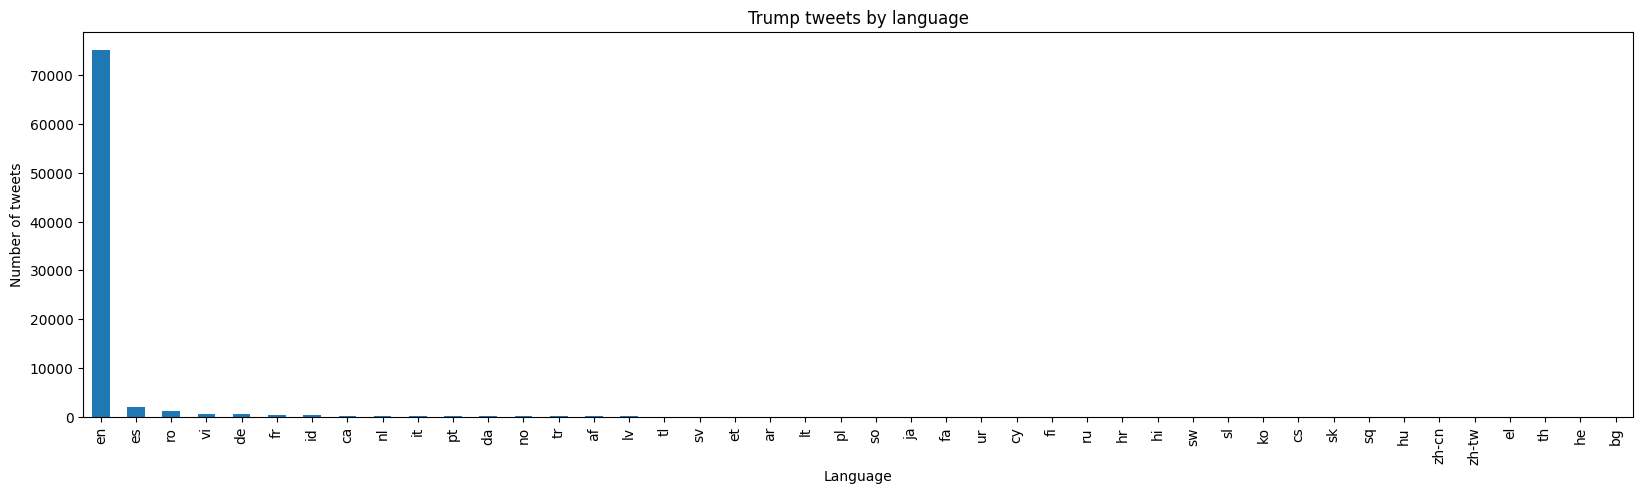

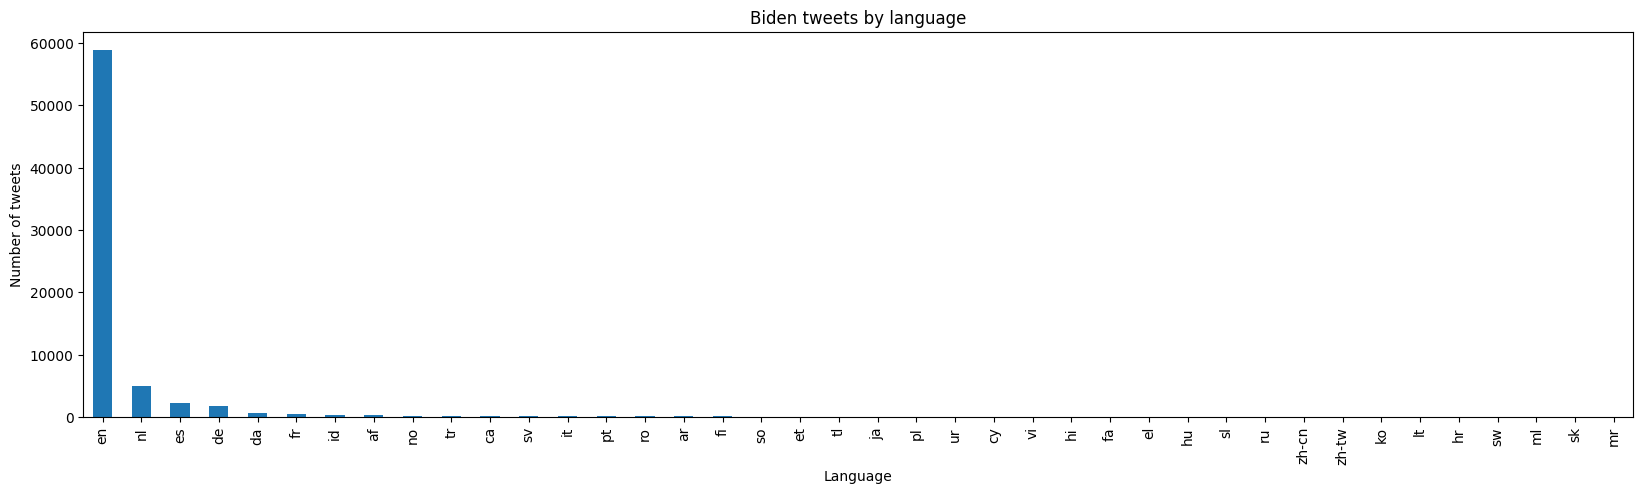

In [29]:
plt.figure(figsize=(20,5))
ax = trump_usa_clean.lang.value_counts().plot(kind='bar')
ax.set_title('Trump tweets by language')
ax.set_xlabel('Language')
ax.set_ylabel('Number of tweets')
plt.show()

plt.figure(figsize=(20,5))
ax = biden_usa_clean.lang.value_counts().plot(kind='bar')
ax.set_title('Biden tweets by language')
ax.set_xlabel('Language')
ax.set_ylabel('Number of tweets')
plt.show()

In [30]:
# show it in different way
total_lang_trump = trump_usa_clean.lang.value_counts()
total_lang_biden = biden_usa_clean.lang.value_counts()

# print top three value coutns on each language
print('Top three on Trump dataset:', total_lang_trump[:3])
print('Top three on Biden dataset:', total_lang_biden[:3])


Top three on Trump dataset: lang
en    75148
es     1976
ro     1262
Name: count, dtype: int64
Top three on Biden dataset: lang
en    58876
nl     4913
es     2196
Name: count, dtype: int64


In [31]:
#lets try to keep just the en language to make it easier to analyze

biden_en = biden_usa_clean[biden_usa_clean.lang == 'en']
trump_en = trump_usa_clean[trump_usa_clean.lang == 'en']

print('Total of en in Trump dataset:', trump_en.shape)
print('Total of en in Biden dataset:', biden_en.shape)

Total of en in Trump dataset: (75148, 16)
Total of en in Biden dataset: (58876, 16)


## 1.5 Analyze more 

In [32]:
# When were the tweets collected?
x = trump_en.created_at.min(), trump_en.created_at.max()
print(x)

y = biden_en.created_at.min(), biden_en.created_at.max()
print(y)

('2020-10-15 00:00:02', '2020-11-08 23:58:38')
('2020-10-15 00:01:47', '2020-11-08 23:58:24')


In [33]:
trump_en.head()

,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,lang
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,en
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,en
12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,1.243315e+18,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,en
22,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,en
29,2020-10-15 00:01:30,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,3.602439e+07,1952.0,"Western Washington, USA",41.882823,-87.686307,Chicago,United States of America,North America,Illinois,IL,en


In [34]:
trump_en['origin_tweet'] = 'trump'
biden_en['origin_tweet'] = 'biden'

tweets_df = pd.concat([trump_en, biden_en], ignore_index=True)

tweets_df.head()

/tmp/ipykernel_16002/4193569125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_en['origin_tweet'] = 'trump'
/tmp/ipykernel_16002/4193569125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_en['origin_tweet'] = 'biden'


,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,lang,origin_tweet
0,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,en,trump
1,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,en,trump
2,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,1.243315e+18,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,en,trump
3,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,en,trump
4,2020-10-15 00:01:30,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,3.602439e+07,1952.0,"Western Washington, USA",41.882823,-87.686307,Chicago,United States of America,North America,Illinois,IL,en,trump


In [35]:
#conver date so we can look by graph
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134024 entries, 0 to 134023
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            134024 non-null  datetime64[ns]
 1   tweet_id              134024 non-null  float64       
 2   tweet                 134024 non-null  object        
 3   likes                 134024 non-null  float64       
 4   retweet_count         134024 non-null  float64       
 5   user_id               134024 non-null  float64       
 6   user_followers_count  134024 non-null  float64       
 7   user_location         134024 non-null  object        
 8   lat                   134024 non-null  float64       
 9   long                  134024 non-null  float64       
 10  city                  134024 non-null  object        
 11  country               134024 non-null  object        
 12  continent             134024 non-null  object        
 13 

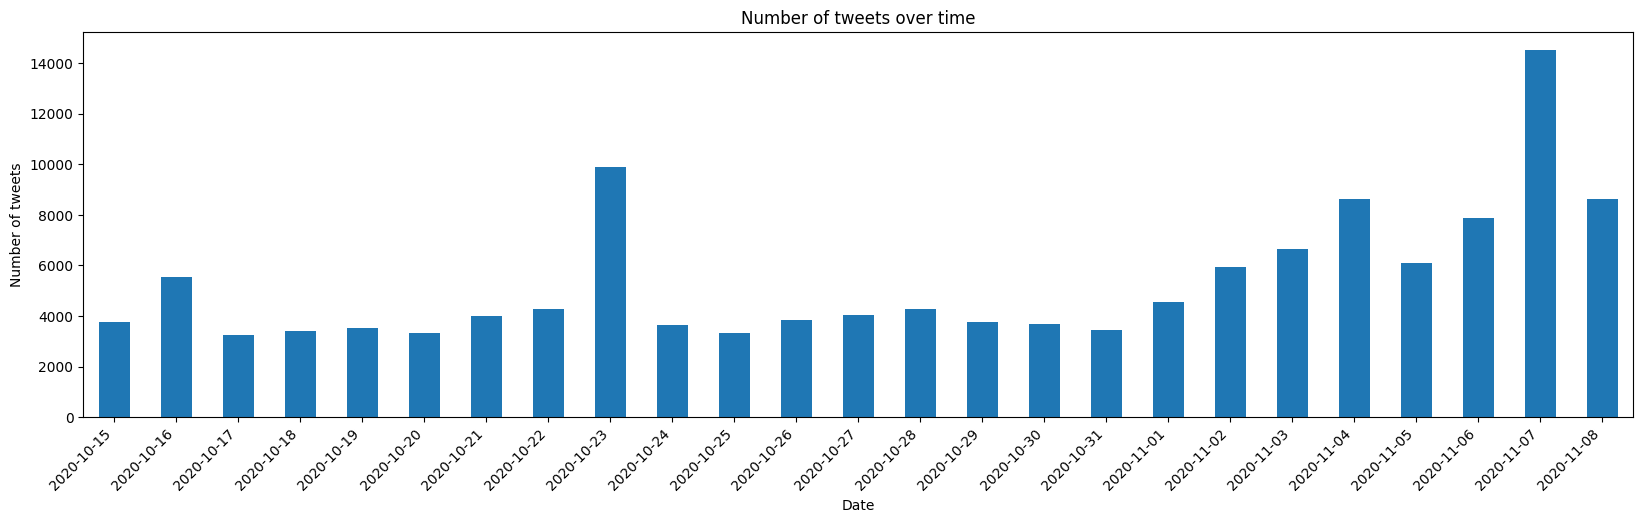

It took 0.1 seconds


In [37]:
start_time = time.time()

plt.figure(figsize=(20,5))

tweets_df.created_at.dt.date.value_counts().sort_index().plot(kind='bar')

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Number of tweets over time')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

stop_time = time.time()
print(f'It took {np.around((time.time() - start_time), decimals=1)} seconds')

In [38]:
## Find the popular tweets

most_popular_tweets = tweets_df.groupby(['tweet']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
most_popular_tweets

,tweet,counts
54248,@realDonaldTrump I agree with this article..\n...,51
55205,@realDonaldTrump This is how #donaldtrump gets...,45
93544,Make America Great Again! #ThingsTrumpSay #Tru...,42
54019,@realDonaldTrump Even the head of #FoxNews kno...,42
54692,"@realDonaldTrump No doubt, #AmericaFirst &amp;...",38
34124,@JoeBiden #BelieveInAmerica\n#TrumpIsALaughing...,37
53930,"@realDonaldTrump Corruption, racism, mass deat...",33
54836,"@realDonaldTrump Per John Kelly, the most flaw...",28
34125,@JoeBiden #BelieveInAmerica\n#TrumpIsALaughing...,23
62272,Anti-Trump? PLEASE VOTE #MakeAmericaUnitedAgai...,17


In [46]:
# Another approach by looking at retweet

popular_on_retweet = tweets_df.loc[tweets_df['retweet_count'] > 0].sort_values(by='retweet_count', ascending=False).head(10)
popular_on_retweet[['tweet', 'retweet_count']].reset_index(drop=True)

,tweet,retweet_count
0,Tonight a woman in the audience of Trump's tow...,17652.0
1,"Are you there, God? It's me, Bette. I'm so sca...",7489.0
2,"Are you there, God? It's me again, Bette. We'r...",6133.0
3,OMG! #JoeBiden speaks like a human being! An...,6038.0
4,The White House still has not released a healt...,5986.0
5,ATTN!\nWhile you were sleeping #Trump issued a...,5135.0
6,My humble advice to @JoeBiden supporters as th...,4849.0
7,"Whatever you do, DON’T BELIEVE THE POLLS. Vot...",4277.0
8,UPDATE: Michigan's #AntrimCounty flipped to a...,3589.0
9,Sorry I couldn’t join @JudgeJeanine tonight bu...,3243.0


In [48]:
print(f'There are {tweets_df.duplicated().sum()} duplicated tweets in the dataset')


There are 148 duplicated tweets in the dataset


In [50]:
print(f'There are {tweets_df.retweet_count.nunique()} differen amount of retweets in the dataset')

There are 519 differen amount of retweets in the dataset


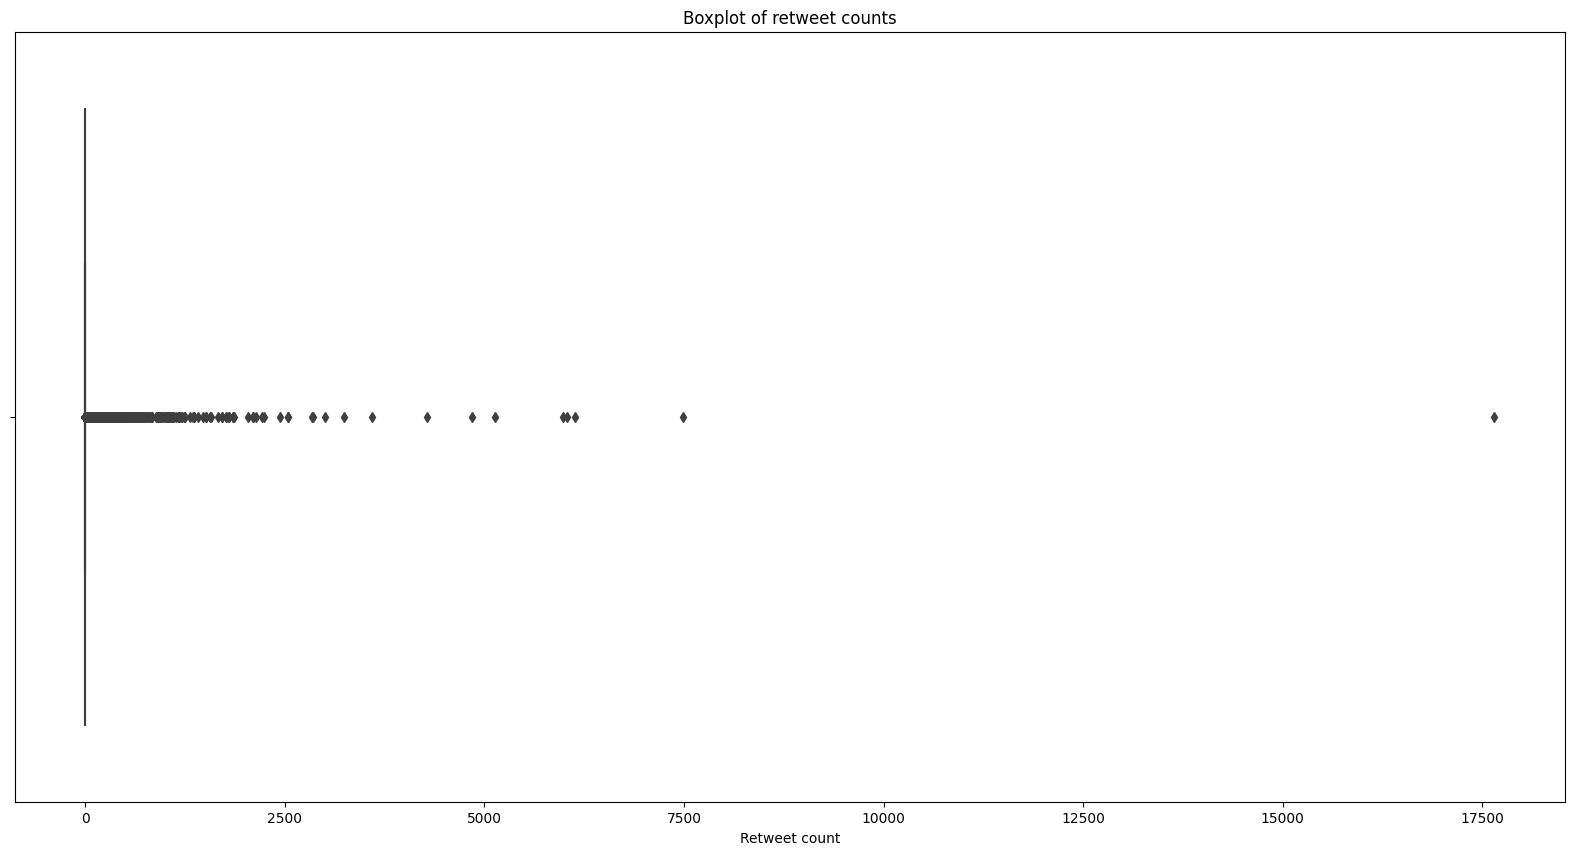

In [53]:
# see plot on seaborn on retweet
plt.figure(figsize=(20,10))
sns.boxplot(x=tweets_df.retweet_count)
plt.title('Boxplot of retweet counts')
plt.xlabel('Retweet count')
plt.show()


## Text pre-processing

In [59]:
tweets_df.tweet.iloc[0]

"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?"

First, we clean our data:

- we convert everything to lowercase
- we remove punctuation, links, @mentions and # hashtags
- we remove stop words - stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”. These don't add any meaningful information for our analysis
- lemmatization - reduces inflected words to the root of that word (e.g. - 'pursuing' becomes 'pursue')
tokenization - split each tweet into a list of individual words

In [76]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords, wordnet


nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abhinowo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/abhinowo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhinowo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/abhinowo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/abhinowo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords # we also use gensim for stopwords removal
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import nltk  
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet


In [ ]:
# # wordnet

# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

# def clean_text(tweet, lemmatize = 'nltk'):
#     # remove urls
#     tweet = re.sub(r'http\S+', '', tweet)
#     # remove mentions
#     tweet = re.sub(r'@\w+','', tweet)
#     # remove hashtags
#     tweet = re.sub(r'#\w+', '', tweet)
#     # remove digits
#     tweet = re.sub(r'\d+', '', tweet)
#     # remove html tags
#     tweet = re.sub('r<.*?>','', tweet)
#     # remove stop words
#     tweet = [word for word in tweet.split() if word not in stopwords]
#     # lemmatize
#     if lemmatize == 'nltk':
#         lemmatizer = WordNetLemmatizer()
#         tweet = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet]
#     elif lemmatize == 'spacy':
#         tweet = [word.lemma_ for word in nlp(' '.join(tweet))]
#     # join words into sentence
#     tweet = ' '.join(tweet)
#     return tweet

# tweets_df['clean_tweet'] = tweets_df.tweet.apply(lambda x: clean_text(x))

# tweets_df.head()


In [73]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
def clean_text(tweet, lemmatize = 'nltk'):
    """
    Inputs:
    tweet - a string representing the text we need to clean
    lemmatize - one of two possible values {spacy, nltk} 
      two lemmatization methods
      with our dataset, we got the best results with nltk
      but Spacy also did a good job, hence you might 
      try both and compare results for your own data
    
    Output: 
    tokenized - the cleaned text, tokenized (a list of string words)
    """

    tweet = tweet.lower() # lowercase
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE) # remove urls
    tweet = re.sub(r'\@\w+|\#','', tweet) # remove mentions of other usernames and the hashtag character
    tweet = remove_stopwords(tweet) # remove stopwords with Gensim

    if (lemmatize == 'spacy'):
        # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
        nlp = spacy.load('en', disable=['parser', 'ner'])
        doc = nlp(tweet)
        tokenized = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    elif (lemmatize == 'nltk'): 
        lemmatizer = WordNetLemmatizer()
        tokenized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(tweet)]
    
    # remove left over stop words with nltk
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # remove non-alpha characters and keep the words of length >2 only
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]

    return tokenized

def combine_tokens(tokenized): 
    non_tokenized = ' '.join([w for w in tokenized])
    return non_tokenized

In [77]:
start =  time.time()

try:
    tweets_df['tokenized_tweet_nltk'] = tweets_df['tweet'].apply(lambda x: clean_text(x, 'nltk'))
    tweets_df['clean_tweet_nltk'] = tweets_df['tokenized_tweet_nltk'].apply(lambda x: combine_tokens(x))
except Exception as e:
    print(f"An error occurred: {str(e)}")

stop = time.time()
print(f'Cleaning all tweets takes ~{round((stop-start)/60, 3)} minutes: ')

Cleaning all tweets takes ~3.271 minutes: 


In [78]:
tweets_df.tweet.iloc[0]

"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?"

In [80]:
tweets_df.to_csv(output + '/clean_tweets_df.csv', index=False)


## Finnish